# Section 02: Coordinates
### **`01-Zooming In`**
In the video, you saw different ways of using the coordinates layer to zoom in. In this exercise, we'll compare zooming by changing scales and by changing coordinates.

The big difference is that the scale functions change the underlying dataset, which affects calculations made by computed geoms (like histograms or smooth trend lines), whereas coordinate functions make no changes to the dataset.

A scatter plot using `mtcars` with a LOESS smoothed trend line is provided. Take a look at this before updating it.


In [2]:
library(tidyverse)
mtcars <- read.csv("..\\00_Datasets\\mtcars_v2.csv", header=TRUE)
head(mtcars,3)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



,X,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,fcyl,fam,car
,<chr>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>
1,Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4,6,manual,Mazda RX4
2,Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4,6,manual,Mazda RX4 Wag
3,Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1,4,manual,Datsun 710


`geom_smooth()` using method = 'loess' and formula 'y ~ x'



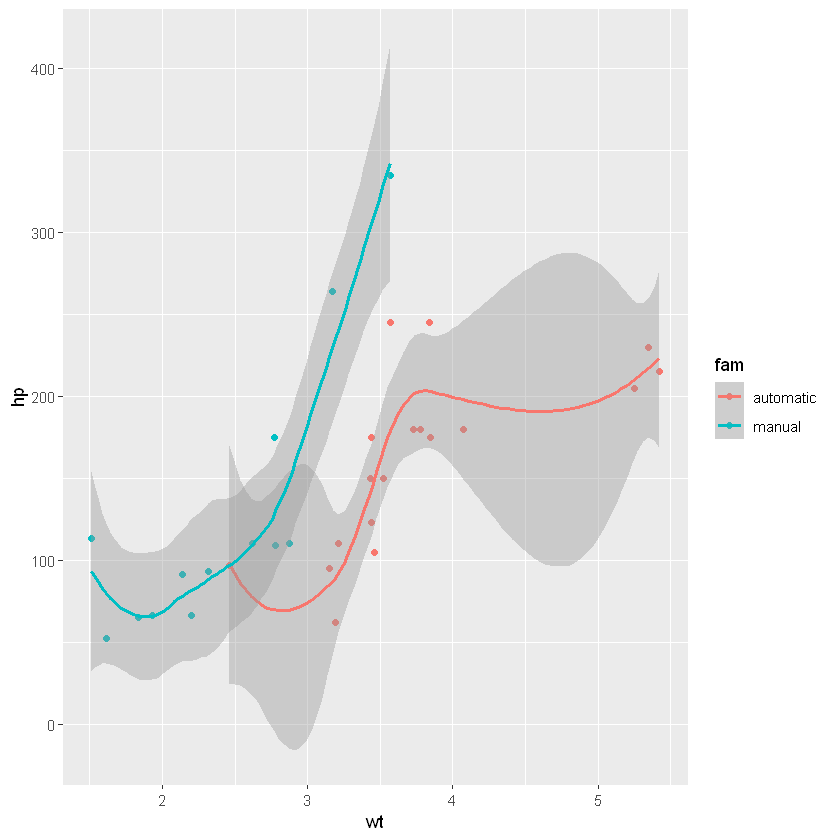

In [3]:
# Run the code, view the plot, then update it
ggplot(mtcars, aes(x = wt, y = hp, color = fam)) +
  geom_point() +
  geom_smooth() 
  # Add a continuous x scale from 3 to 6

-   Update the plot by adding (`+`) a continuous x scale with `limits` from `3` to `6`. *Spoiler: this will cause a problem!*


`geom_smooth()` using method = 'loess' and formula 'y ~ x'

Warning message:
"Removed 12 rows containing non-finite values (stat_smooth)."
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"span too small.   fewer data values than degrees of freedom."
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"at  3.168"
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"radius  4e-06"
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"all data on boundary of neighborhood. make span bigger"
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"pseudoinverse used at 3.168"
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"neighborhood radius 0.002"
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"reciprocal condition num

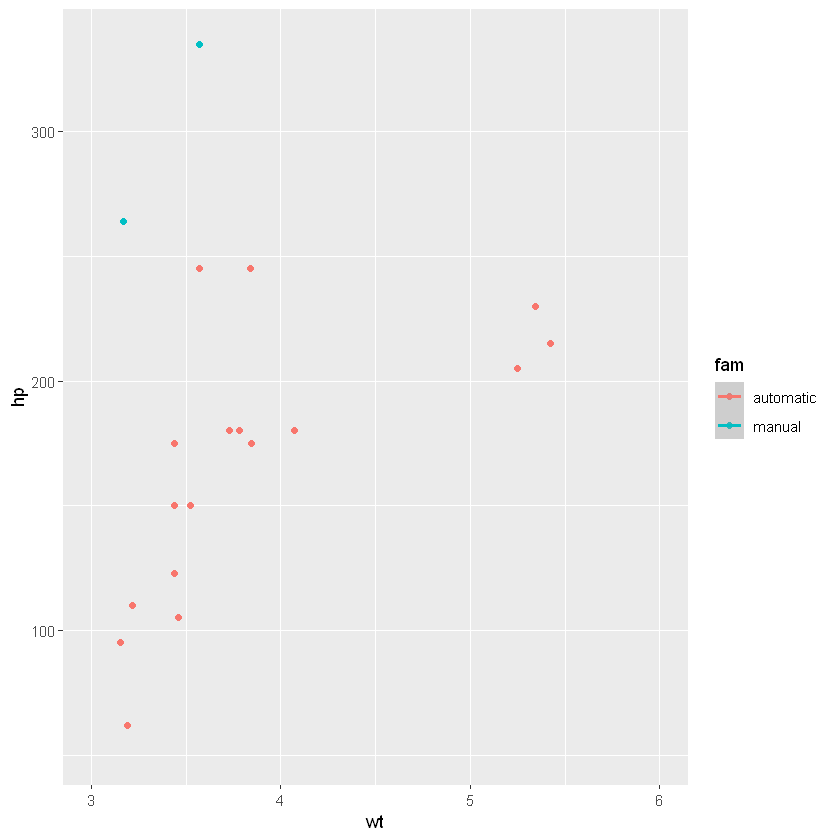

In [4]:
    # Run the code, view the plot, then update it
    ggplot(mtcars, aes(x = wt, y = hp, color = fam)) +
      geom_point() +
      geom_smooth() + 
      # Add a continuous x scale from 3 to 6
      scale_x_continuous(limits=c(3,6))

- Update the plot by adding a Cartesian coordinate system with x limits, `xlim`, from `3` to `6`.


`geom_smooth()` using method = 'loess' and formula 'y ~ x'



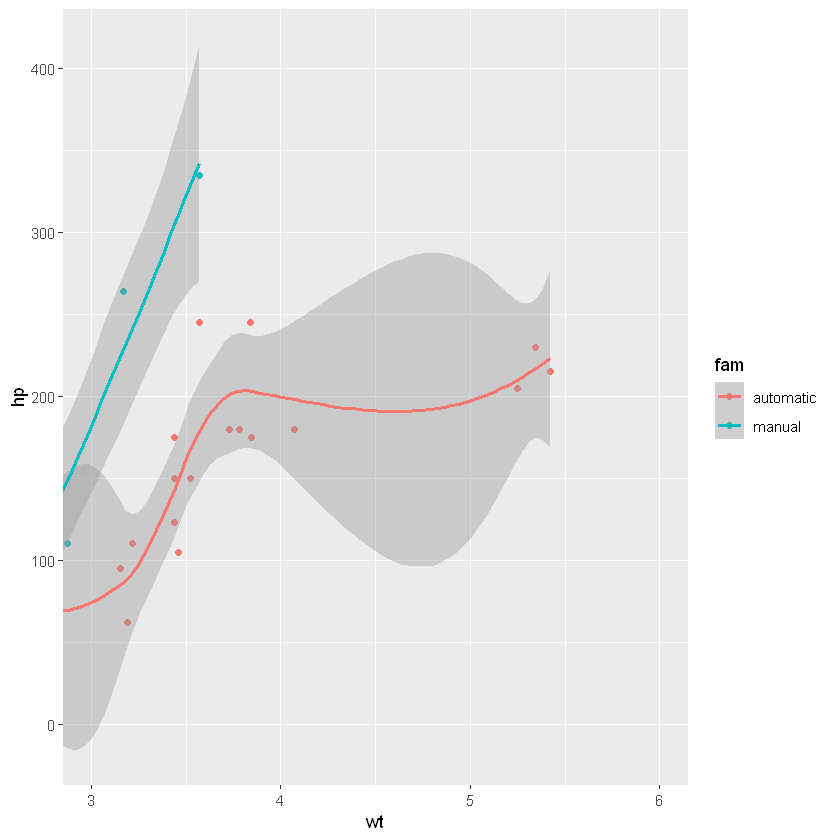

In [5]:
ggplot(mtcars, aes(x = wt, y = hp, color = fam)) +
  geom_point() +
  geom_smooth() +
  # Add Cartesian coordinates with x limits from 3 to 6
  coord_cartesian(xlim= c(3,6))

### **`02-Aspect ratio I: 1:1 ratios`**

We can set the aspect ratio of a plot with `coord_fixed()`, which uses `ratio = 1` as a default. A 1:1 aspect ratio is most appropriate when two continuous variables are on the same scale, as with the `iris` dataset.

All variables are measured in centimeters, so it only makes sense that one unit on the plot should be the same physical distance on each axis. This gives a more truthful depiction of the relationship between the two variables since the aspect ratio can change the angle of our smoothing line. This would give an erroneous impression of the data. Of course the underlying linear models don't change, but our perception can be influenced by the angle drawn.

- A plot using the `iris` dataset, of sepal width vs. sepal length colored by species, is shown in the viewer.

- Add a fixed coordinate layer to force a 1:1 aspect ratio.

In [6]:
library(tidyverse)
library(datasets)
data(iris)

### **`03-Aspect ratio II: setting ratios`**

When values are not on the same scale it can be a bit tricky to set an appropriate aspect ratio. A classic William Cleveland (inventor of dot plots) example is the `sunspots` data set. We have 3200 observations from 1750 to 2016.

`sun_plot` is a plot *without* any set aspect ratio. It fills up the graphics device.

To make aspect ratios clear, we've drawn an orange box that is 75 units high and 75 *years* wide. Using a 1:1 aspect ratio would make the box square. That aspect ratio would make things harder to see the oscillations: it is better to force a wider ratio.

In [7]:
#install.packages("zoo")
#install.packages("reshape2")

In [8]:
library(zoo)
library(reshape2)

sunspots.m <- data.frame(
year = index(sunspot.month),
value = reshape2::melt(sunspot.month)$value)


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric



Attaching package: 'reshape2'


The following object is masked from 'package:tidyr':

    smiths




Don't know how to automatically pick scale for object of type ts. Defaulting to continuous.



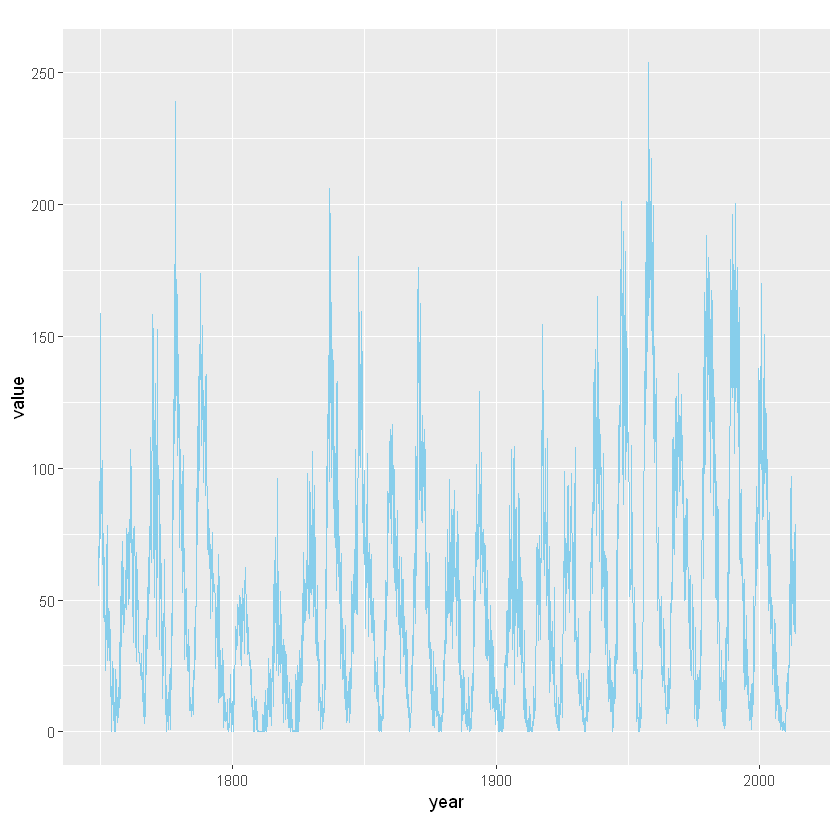

In [9]:
sun_plot <- ggplot(sunspots.m, aes(x = year, y = value )) +
  geom_line(color = "#87CEEB") +
  coord_fixed() # default to 1:1 aspect ratio

sun_plot

-   Fix the coordinates to a 1:1 aspect ratio.


Coordinate system already present. Adding new coordinate system, which will replace the existing one.

Don't know how to automatically pick scale for object of type ts. Defaulting to continuous.



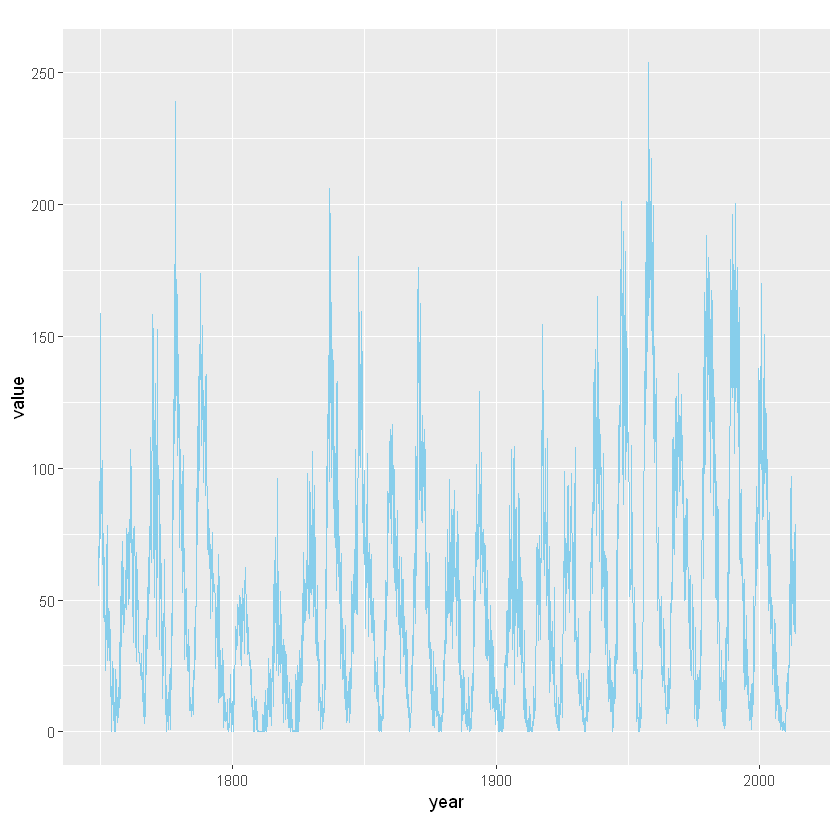

In [10]:
# Fix the aspect ratio to 1:1
sun_plot +
  coord_fixed(ratio = 1)

The `y` axis is now unreadably small. Make it bigger!

-   Change the aspect `ratio` to 20:1. This is the aspect ratio recommended by Cleveland to help make the trend among oscillations easiest to see.

Coordinate system already present. Adding new coordinate system, which will replace the existing one.

Don't know how to automatically pick scale for object of type ts. Defaulting to continuous.



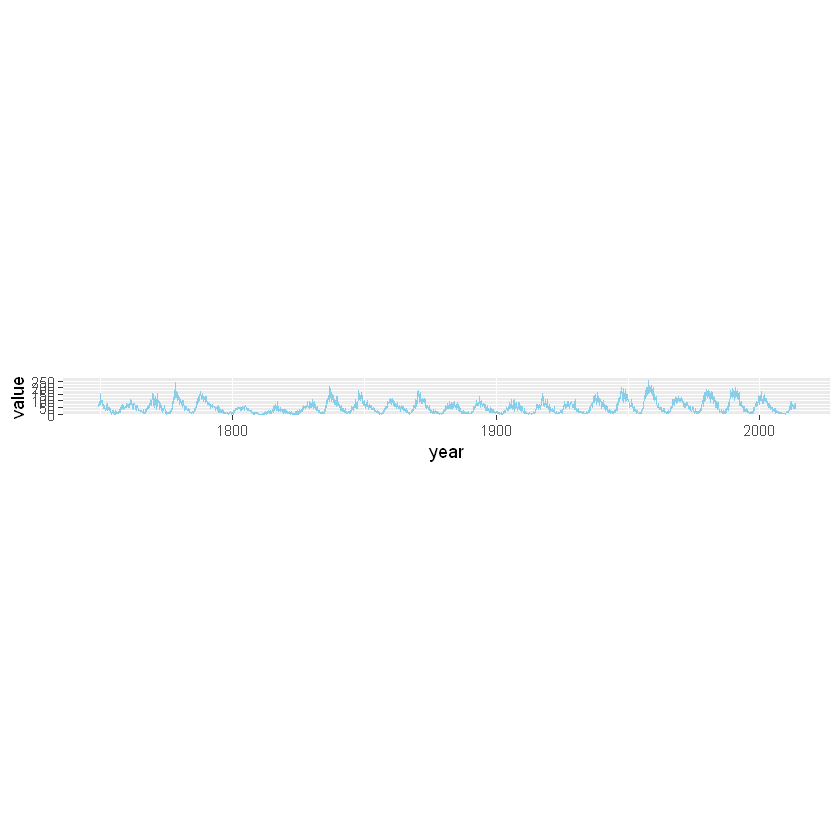

In [11]:
# Change the aspect ratio to 20:1
sun_plot +
  #coord_fixed(ratio = 20)
  coord_fixed(ratio = 0.05)

Coordinate system already present. Adding new coordinate system, which will replace the existing one.

Don't know how to automatically pick scale for object of type ts. Defaulting to continuous.



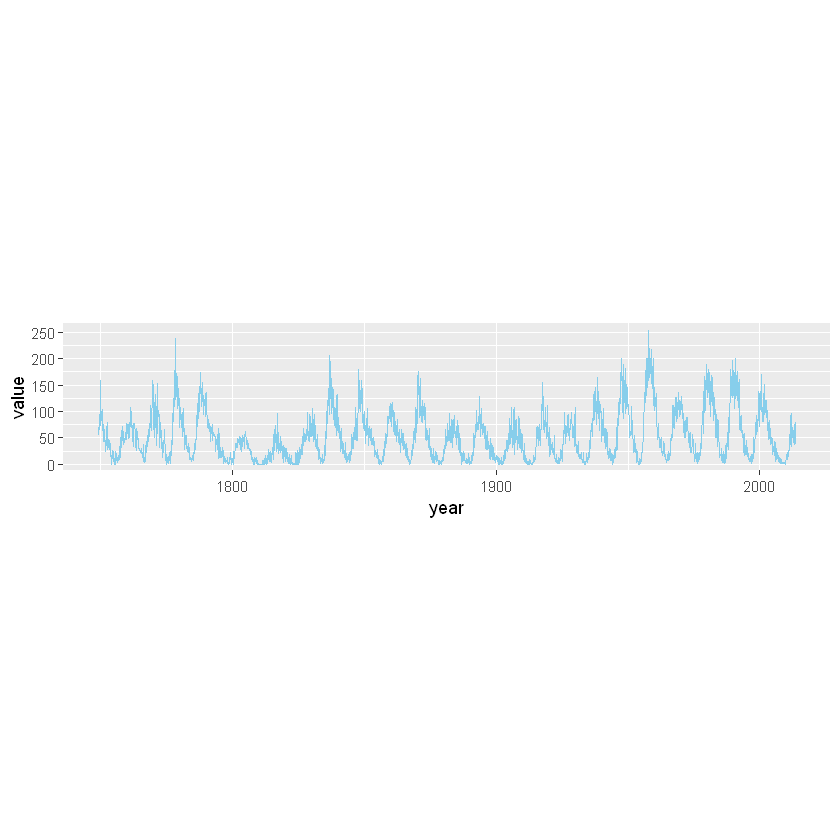

In [12]:
# Change the aspect ratio to 20:1
sun_plot +
  #coord_fixed(ratio = 20)
  coord_fixed(ratio = 0.2)

### **`04-Expand and clip`**

The `coord_*()` layer functions offer two useful arguments that work well together: `expand` and `clip`.

-   `expand` sets a buffer margin around the plot, so data and axes don't overlap. Setting `expand` to `0` draws the axes to the limits of the data.

-   `clip` decides whether plot elements that would lie outside the plot panel are displayed or ignored ("clipped").

When done properly this can make a great visual effect! We'll use `theme_classic()` and modify the axis lines in this example.

#### `Questions`

-   Add Cartesian coordinates with zero expansion, to remove all buffer margins on both the x and y axes.

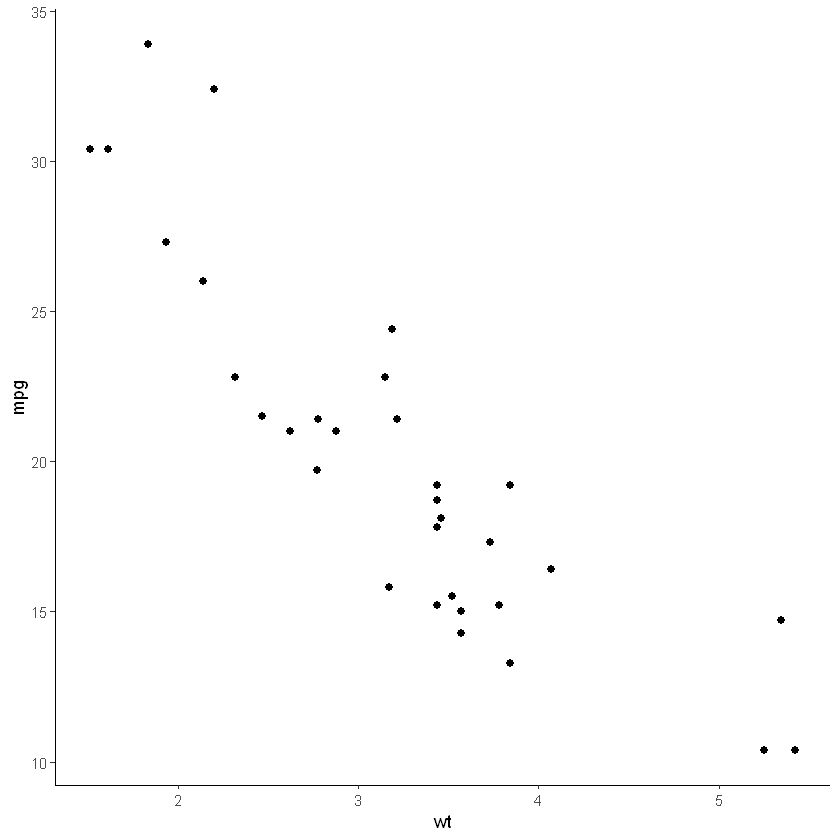

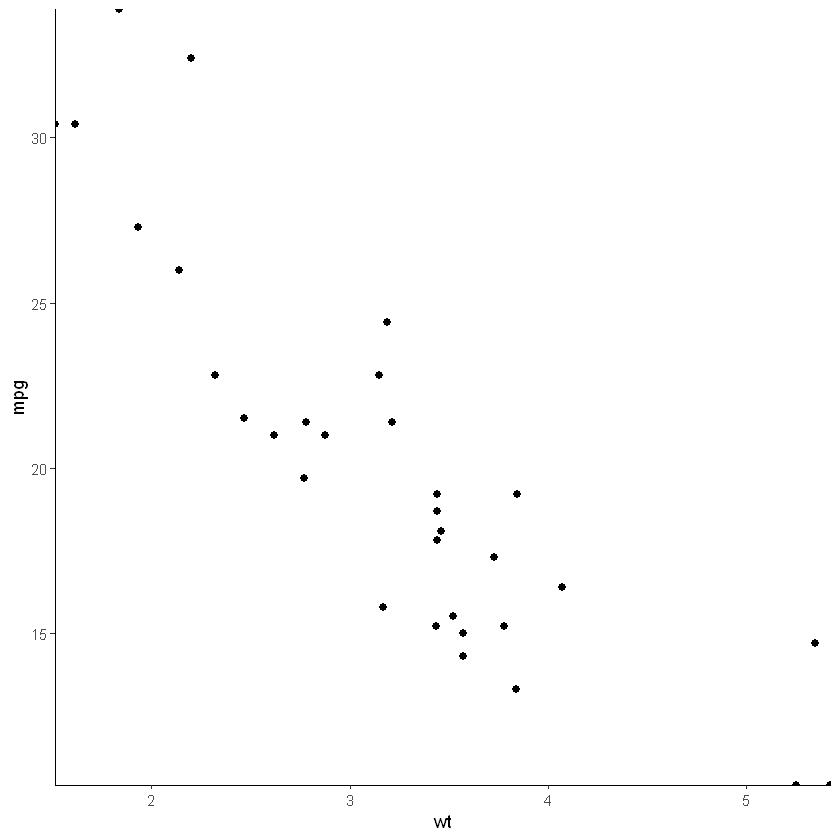

In [13]:
ggplot(mtcars, aes(wt, mpg)) +
  geom_point(size = 2) +
  # Add Cartesian coordinates with zero expansion
  theme_classic()


ggplot(mtcars, aes(wt, mpg)) +
  geom_point(size = 2) +
  # Add Cartesian coordinates with zero expansion
  coord_cartesian(expand = 0) +
  theme_classic()

Setting `expand` to `0` caused points at the edge of the plot panel to be cut off.

-   Set the `clip` argument to `"off"` to prevent this.

-   Remove the axis lines by setting the `axis.line` argument to `element_blank()` in the `theme()` layer function.


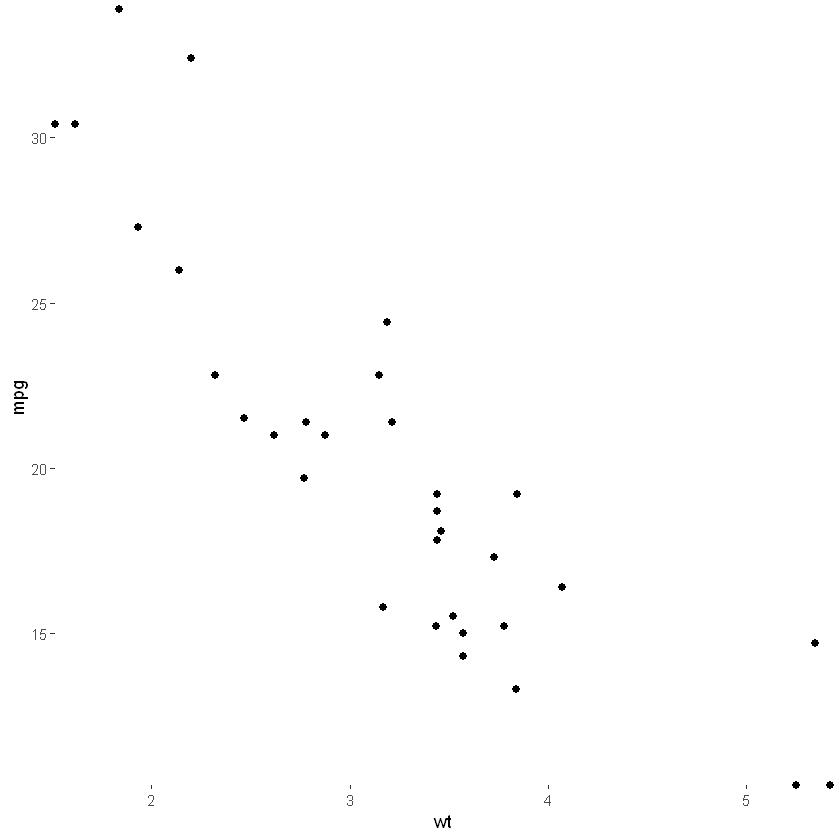

In [14]:
    ggplot(mtcars, aes(wt, mpg)) +
      geom_point(size = 2) +
      # Turn clipping off
      coord_cartesian(expand = 0, clip = "off") +
      theme_classic() +
      # Remove axis lines
      theme(axis.line = element_blank())

### **`05-Log-transforming scales`**

- Using `scale_y_log10()` and `scale_x_log10()` is equivalent to transforming our actual dataset *before* getting to `ggplot2`.

- Using `coord_trans()`, setting `x = "log10"` and/or `y = "log10"` arguments, transforms the data *after* statistics have been calculated. The plot will look the same as with using `scale_*_log10()`, but the scales will be different, meaning that we'll see the original values on our log10 transformed axes. This can be useful since log scales can be somewhat unintuitive.

- Let's see this in action with positively skewed data - the brain and body weight of 51 mammals from the `msleep` dataset.

In [15]:
str(msleep)

tibble [83 × 11] (S3: tbl_df/tbl/data.frame)
 $ name        : chr [1:83] "Cheetah" "Owl monkey" "Mountain beaver" "Greater short-tailed shrew" ...
 $ genus       : chr [1:83] "Acinonyx" "Aotus" "Aplodontia" "Blarina" ...
 $ vore        : chr [1:83] "carni" "omni" "herbi" "omni" ...
 $ order       : chr [1:83] "Carnivora" "Primates" "Rodentia" "Soricomorpha" ...
 $ conservation: chr [1:83] "lc" NA "nt" "lc" ...
 $ sleep_total : num [1:83] 12.1 17 14.4 14.9 4 14.4 8.7 7 10.1 3 ...
 $ sleep_rem   : num [1:83] NA 1.8 2.4 2.3 0.7 2.2 1.4 NA 2.9 NA ...
 $ sleep_cycle : num [1:83] NA NA NA 0.133 0.667 ...
 $ awake       : num [1:83] 11.9 7 9.6 9.1 20 9.6 15.3 17 13.9 21 ...
 $ brainwt     : num [1:83] NA 0.0155 NA 0.00029 0.423 NA NA NA 0.07 0.0982 ...
 $ bodywt      : num [1:83] 50 0.48 1.35 0.019 600 ...


Warning message:
"Removed 27 rows containing missing values (geom_point)."


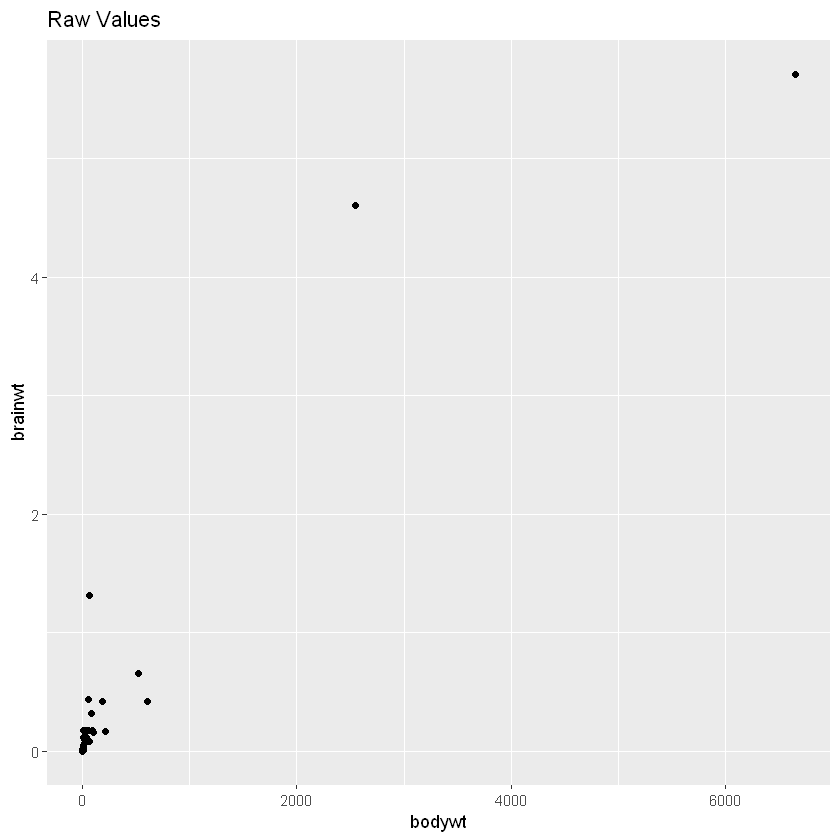

In [16]:
# Produce a scatter plot of brainwt vs. bodywt
ggplot(msleep, aes(bodywt, brainwt)) +
    geom_point() +
    ggtitle("Raw Values")

- Add the `scale_x_log10()` and `scale_y_log10()` layers with default values to transform the data before plotting.


Warning message:
"Removed 27 rows containing missing values (geom_point)."


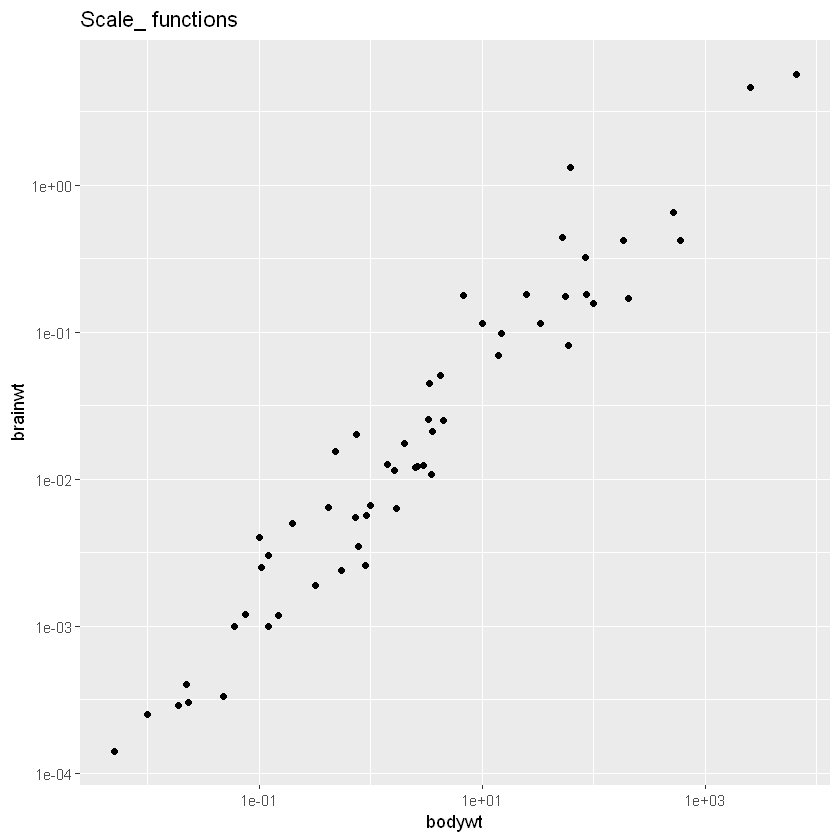

In [17]:
# Add scale_*_*() functions
ggplot(msleep, aes(bodywt, brainwt)) +
  geom_point() +
  scale_x_log10() +
  scale_y_log10() +
  ggtitle("Scale_ functions")

-   Use `coord_trans()` to apply a `"log10"` transformation to both the `x` and `y` scales.


Warning message:
"Removed 27 rows containing missing values (geom_point)."


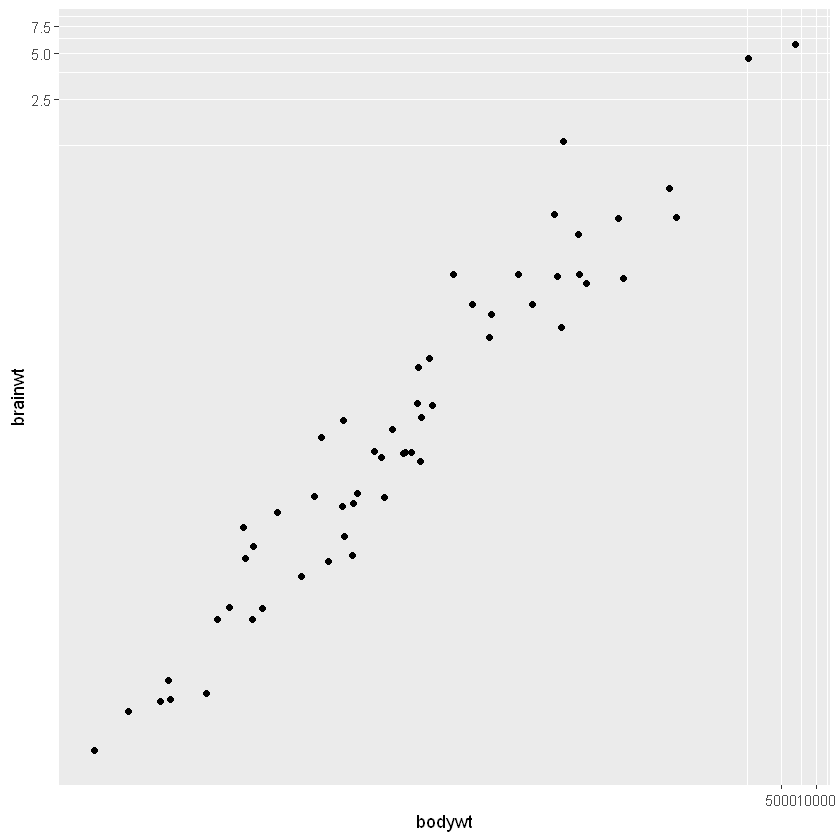

In [18]:
# Perform a log10 coordinate system transformation
ggplot(msleep, aes(bodywt, brainwt)) +
  geom_point() +
  coord_trans(x = "log10", 
              y = "log10")

### **`05-Adding stats to transformed scales`**


`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 27 rows containing non-finite values (stat_smooth)."
Warning message:
"Removed 27 rows containing missing values (geom_point)."


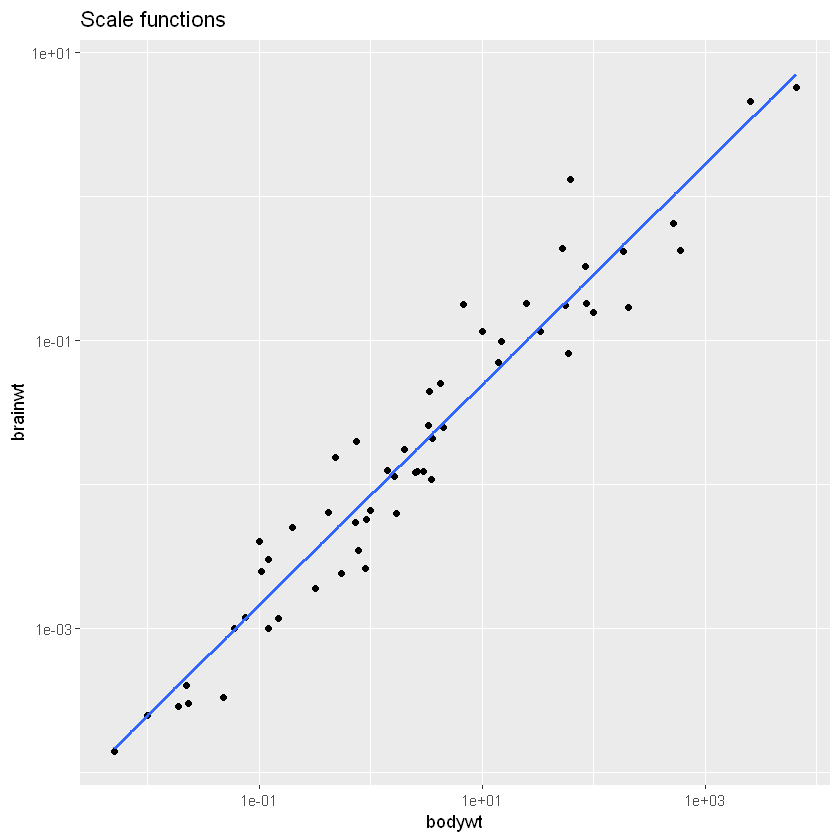

In [19]:
# Plot with a scale_*_*() function:
ggplot(msleep, aes(bodywt, brainwt)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE) +
  # Add a log10 x scale
  scale_x_log10() +
  # Add a log10 y scale
  scale_y_log10() +
  ggtitle("Scale functions")

-   Add a log10 coordinate transformation for both the x and y axes.

-   *Do you notice the difference between the two plots?*

`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 27 rows containing non-finite values (stat_smooth)."
Warning message:
"Removed 27 rows containing missing values (geom_point)."


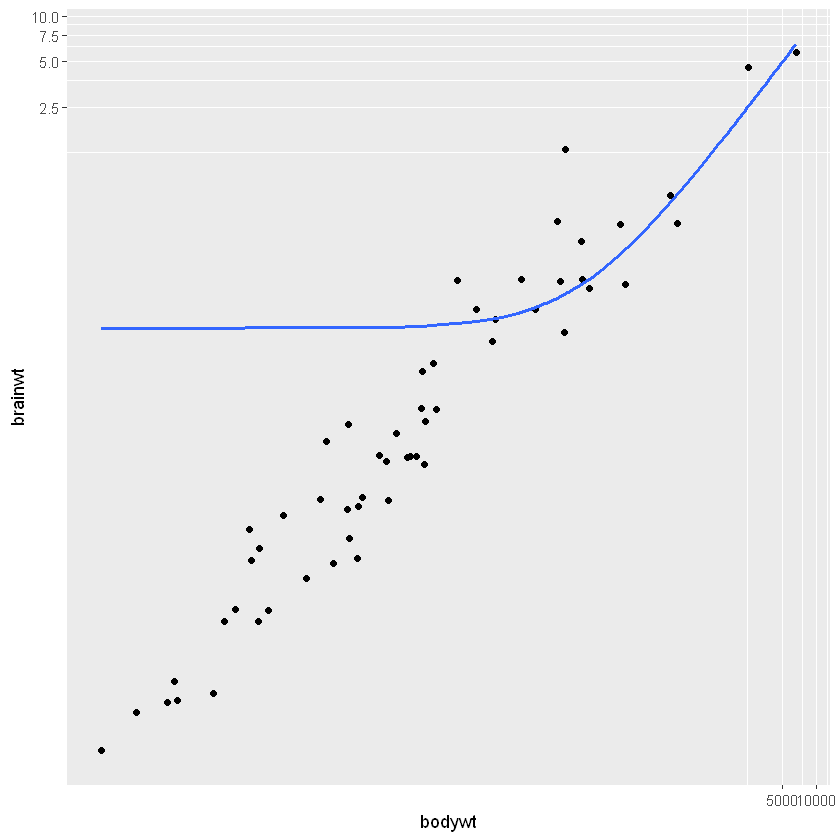

In [20]:
# Plot with transformed coordinates
ggplot(msleep, aes(bodywt, brainwt)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE) +
  # Add a log10 coordinate transformation for x and y axes
  coord_trans(x = "log10", 
              y = "log10")

Loopy lines! The smooth trend line is calculated after scale transformations but not coordinate transformations, so the second plot doesn't make sense. Be careful when using the `coord_trans()` function!

### **`06-Useful double axes`**

Double x and y-axes are a contentious topic in data visualization. We'll revisit that discussion at the end of chapter 4. Here, I want to review a great use case where double axes actually do add value to a plot.

Our goal plot is displayed in the viewer. The two axes are the raw temperature values on a Fahrenheit scale and the transformed values on a Celsius scale.

You can imagine a similar scenario for Log-transformed and original values, miles and kilometers, or pounds and kilograms. A scale that is unintuitive for many people can be made easier by adding a transformation as a double axis.

#### `Questions:`

- Begin with a standard line plot, of `Temp` described by `Date` in the `airquality` dataset.


In [21]:
airquality <- read.csv("..\\00_Datasets\\airquality.csv", header=TRUE)
airquality$Date <- as.Date(airquality$Date, format = "%m/%d/%Y")

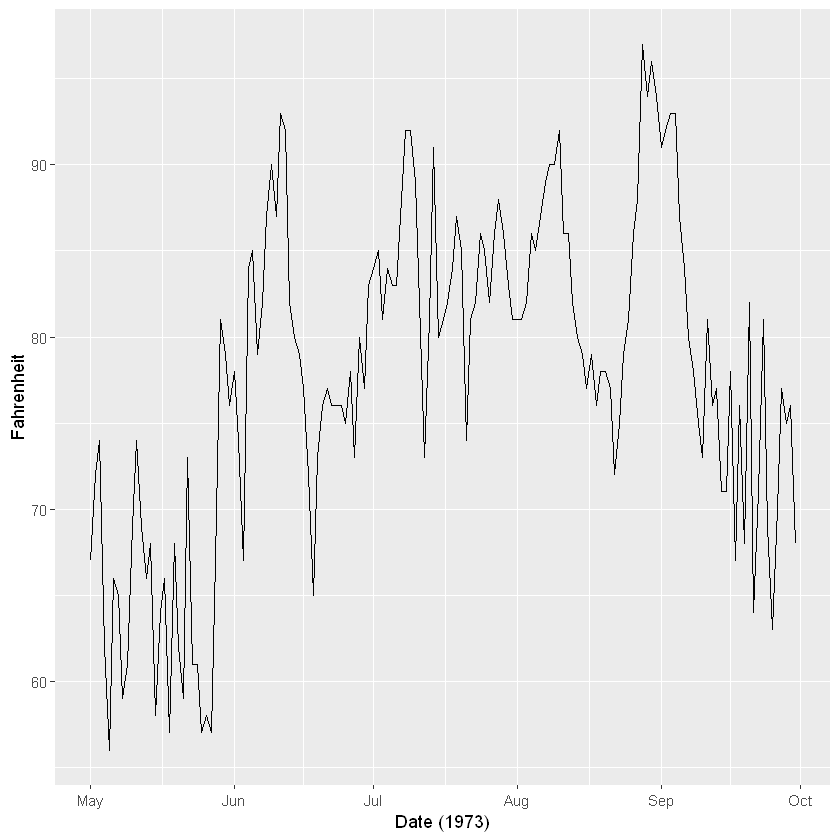

In [22]:
# Using airquality, plot Temp vs. Date
ggplot(airquality, aes(x = Date,y = Temp)) +
  # Add a line layer
  geom_line() +
  labs(x = "Date (1973)", y = "Fahrenheit")

In [23]:
# Define breaks (Fahrenheit)
y_breaks <- c(59, 68, 77, 86, 95, 104)

# Convert y_breaks from Fahrenheit to Celsius
y_labels <- (y_breaks - 32) * 5/9

# Create a secondary x-axis
secondary_y_axis <- sec_axis(
  # Use identity transformation
  trans = identity,
  name = "Celsius",
  # Define breaks and labels as above
  breaks = y_breaks,
  labels = y_labels
)

# Examine the object
secondary_y_axis

<ggproto object: Class AxisSecondary, gg>
    axis: NULL
    break_info: function
    breaks: 59 68 77 86 95 104
    create_scale: function
    detail: 1000
    empty: function
    guide: waiver
    init: function
    labels: 15 20 25 30 35 40
    make_title: function
    mono_test: function
    name: Celsius
    trans: function
    transform_range: function
    super:  <ggproto object: Class AxisSecondary, gg>

-   Add your secondary y-axis to the `sec.axis` argument of `scale_y_continuous()`.


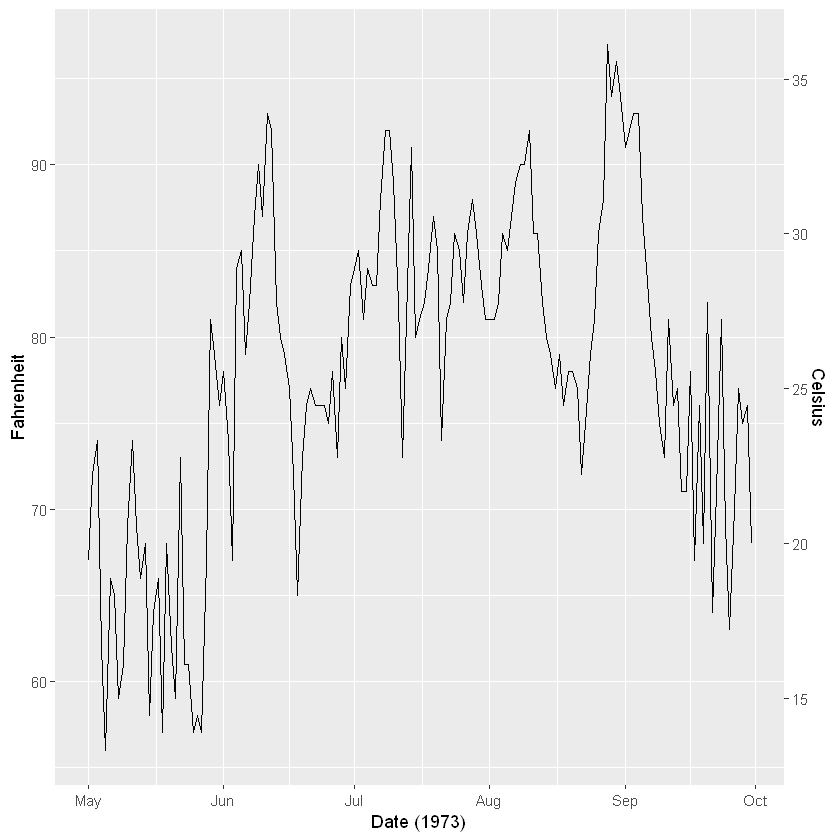

In [24]:
# From previous step
y_breaks <- c(59, 68, 77, 86, 95, 104)
y_labels <- (y_breaks - 32) * 5 / 9
secondary_y_axis <- sec_axis(
  trans = identity,
  name = "Celsius",
  breaks = y_breaks,
  labels = y_labels
)

# Update the plot
ggplot(airquality, aes(Date, Temp)) +
  geom_line() +
  # Add the secondary y-axis 
  scale_y_continuous( sec.axis = secondary_y_axis) +
  labs(x = "Date (1973)", y = "Fahrenheit")

### **`07-Flipping axes I`**

-   Create a side-by-side ("dodged") bar chart of `fam`, filled according to `fcyl`.

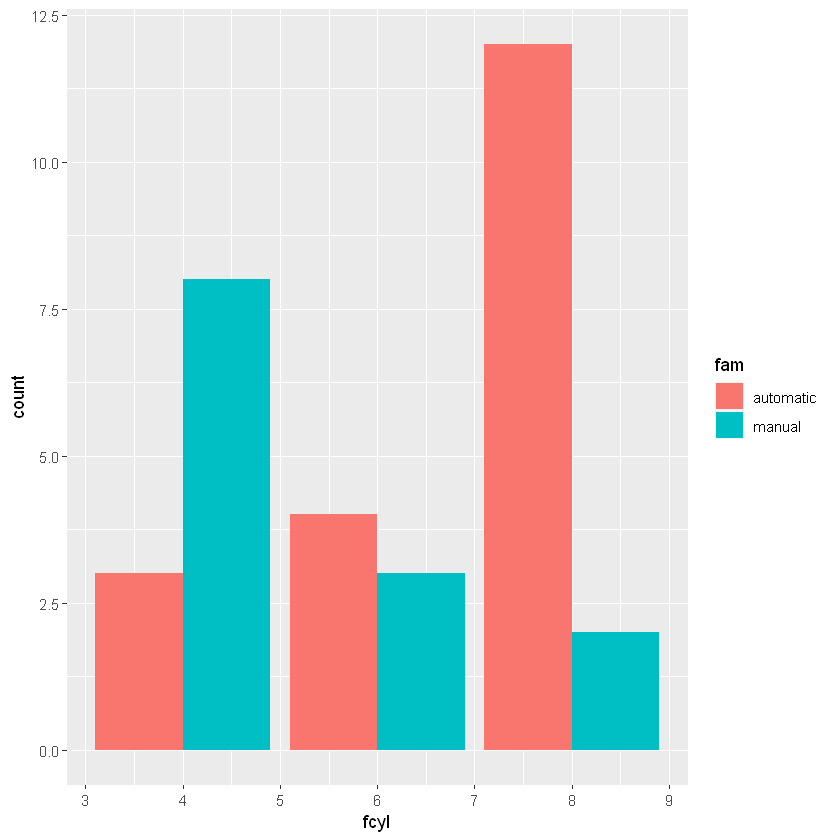

In [25]:
# Plot fcyl bars, filled by fam
ggplot(mtcars, aes(x = fcyl, fill = fam)) +
  # Place bars side by side
  geom_bar(position = "dodge")

-   To get horizontal bars, add a `coord_flip()` function.


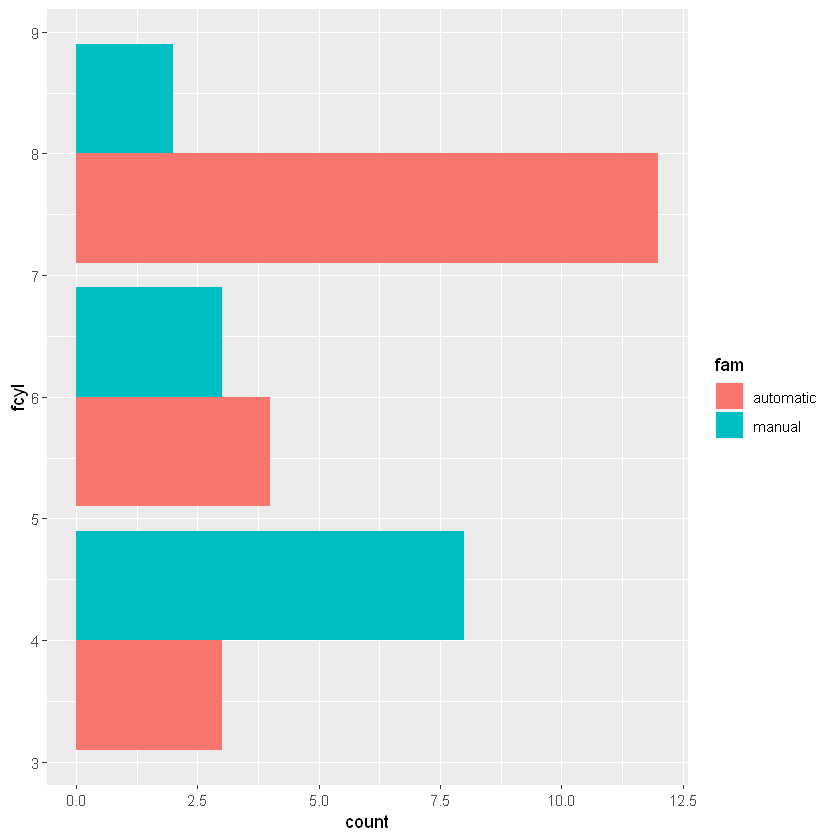

In [26]:
ggplot(mtcars, aes(fcyl, fill = fam)) +
  geom_bar(position = "dodge") +
  # Flip the x and y coordinates
  coord_flip()

-   Partially overlapping bars are popular with "infoviz" in magazines. Update the `position` argument to use `position_dodge()` with a width of `0.5`.


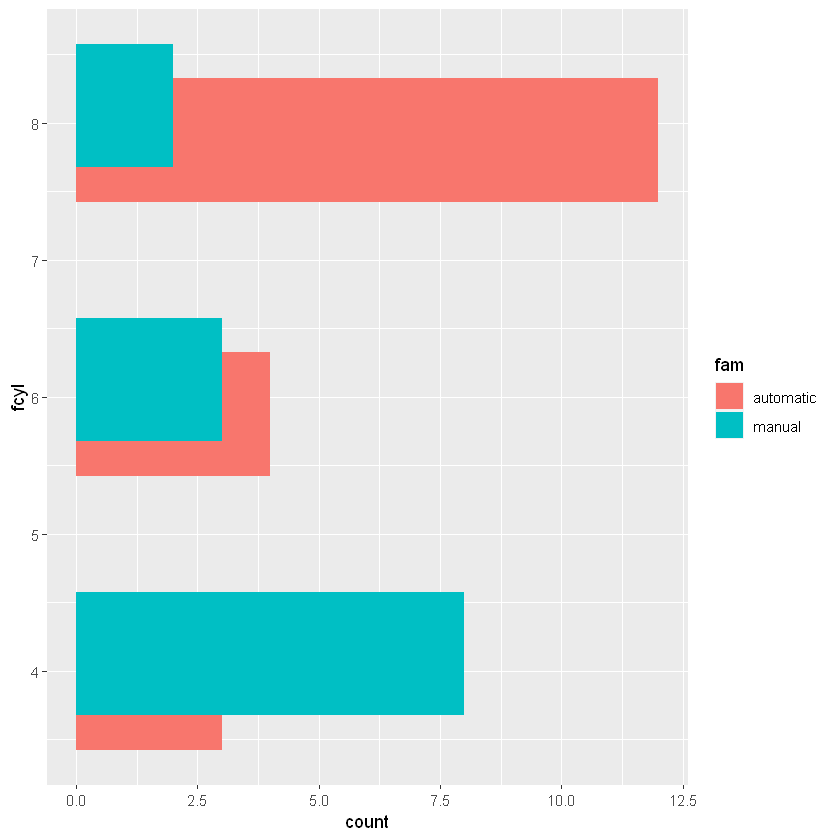

In [27]:
ggplot(mtcars, aes(fcyl, fill = fam)) +
  # Set a dodge width of 0.5 for partially overlapping bars
  geom_bar(position = position_dodge(width = 0.5)) +
  coord_flip()

### **`08-Flipping axes II`**

-   Create a scatter plot of `wt` versus `car` using the `mtcars` dataset. We'll flip the axes in the next step.

-   It would be easier to read if `car` was mapped to the y axis. Flip the coordinates. *Notice that the labels also get flipped!*

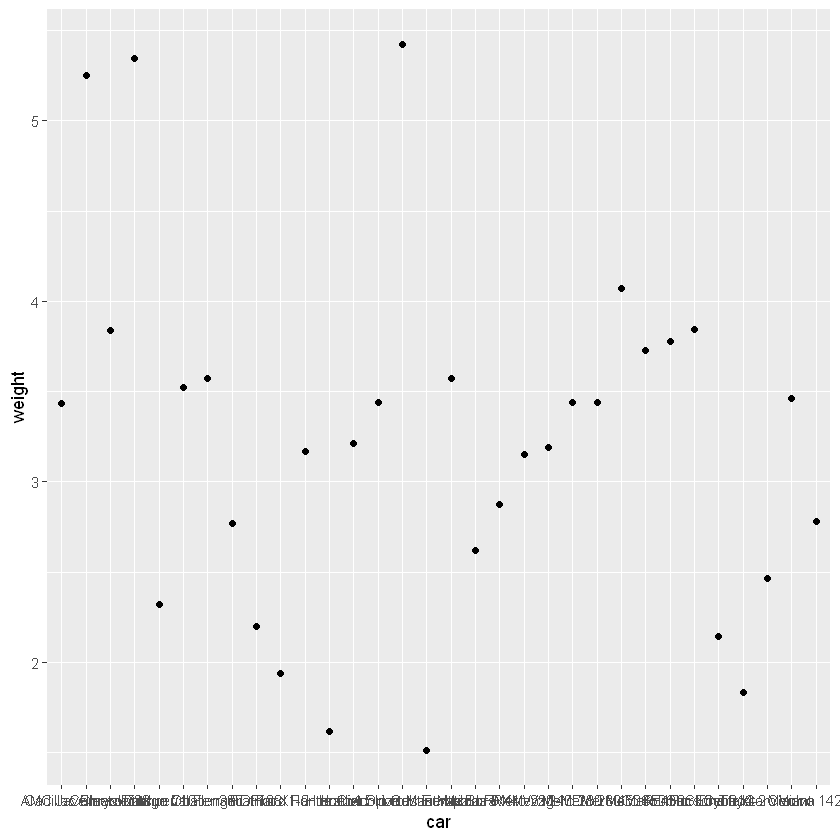

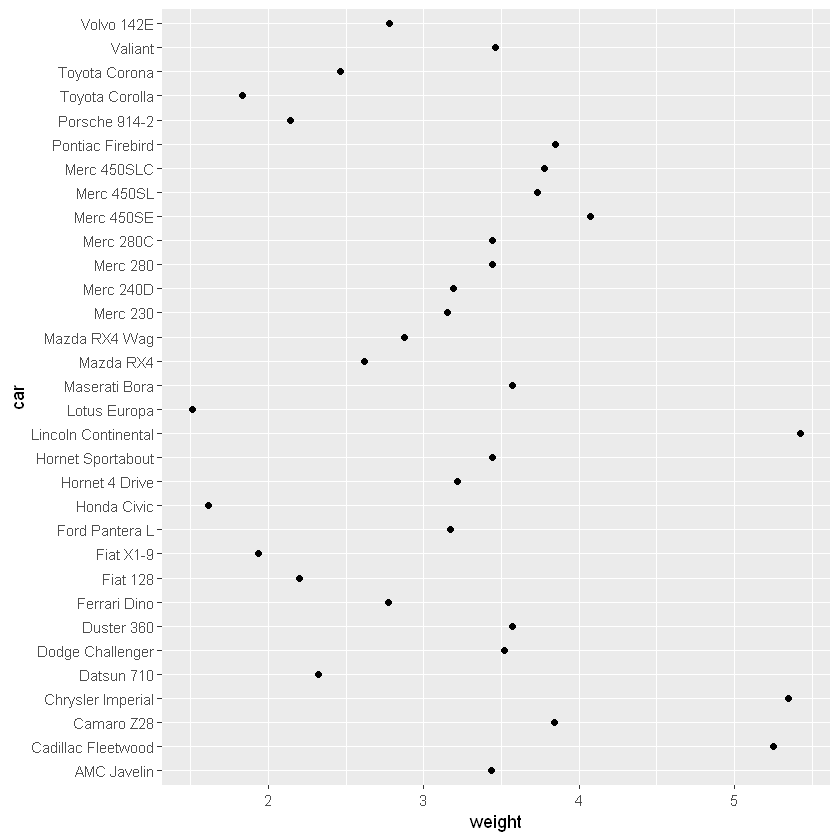

In [28]:
ggplot(mtcars, aes(car, wt)) +
  geom_point() +
  labs(x = "car", y = "weight")


# Flip the axes to set car to the y axis
ggplot(mtcars, aes(car, wt)) +
  geom_point() +
  labs(x = "car", y = "weight") +
  coord_flip()

### **`09-Pie charts`**

The `coord_polar()` function converts a planar x-y Cartesian plot to polar coordinates. This can be useful if you are producing pie charts.

-   *Run the code to see the stacked bar plot.*

-   Add (`+`) a polar coordinate system, mapping the angle to the `y` variable by setting `theta` to `"y"`.

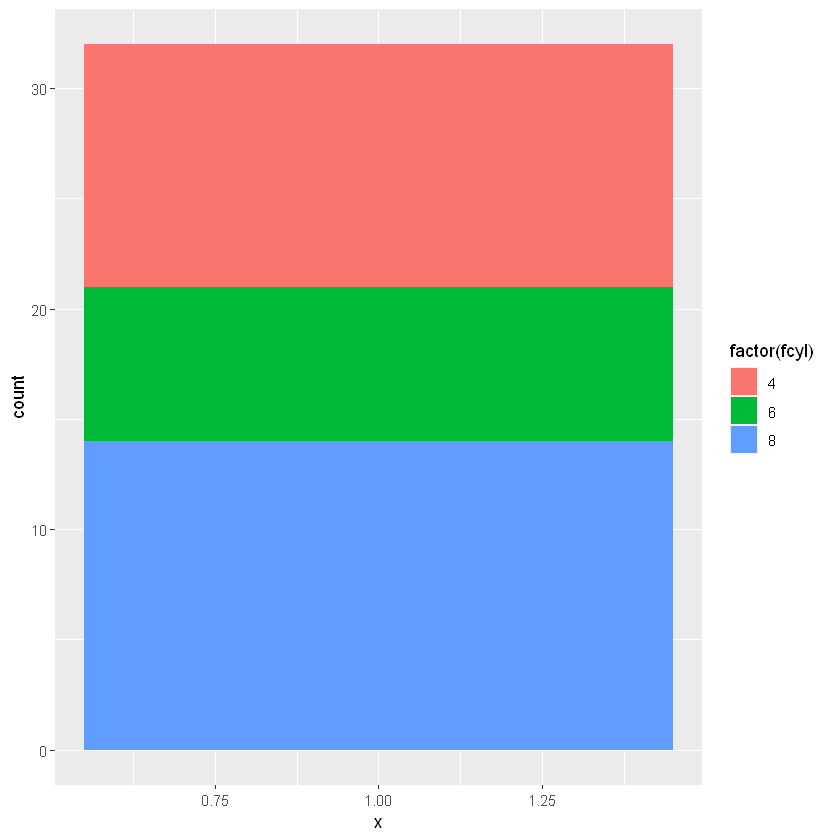

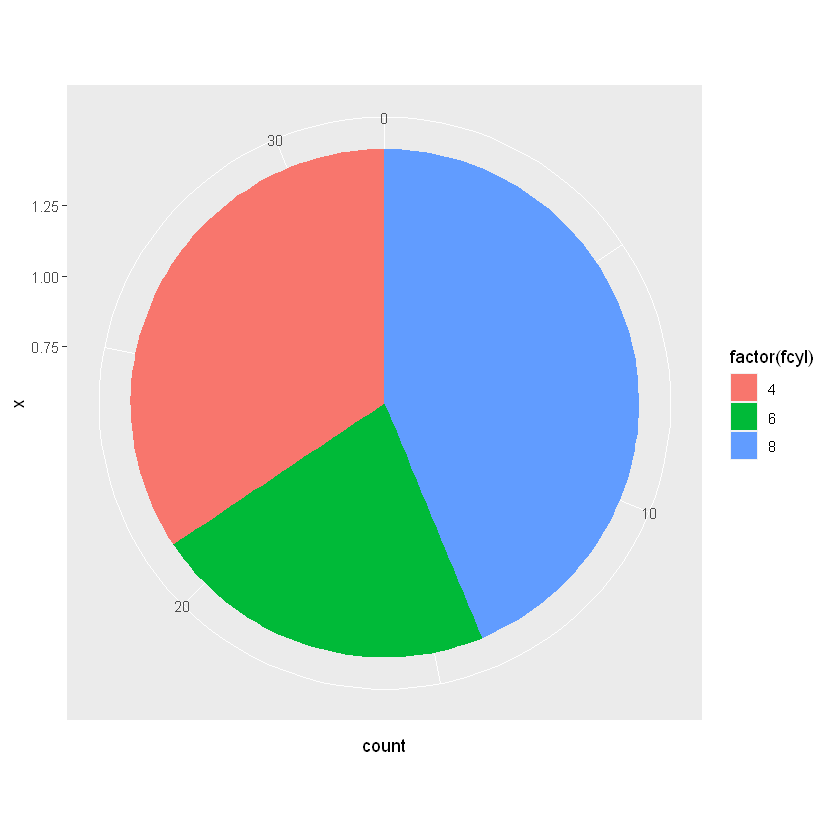

In [29]:
# Run the code, view the plot, then update it
ggplot(mtcars, aes(x = 1, fill = factor(fcyl))) +
  geom_bar()


# Run the code, view the plot, then update it
ggplot(mtcars, aes(x = 1, fill = factor(fcyl))) +
  geom_bar() +
  # Add a polar coordinate system
  coord_polar(theta = "y")

-   Reduce the `width` of the bars to `0.1`.

-   Make it a ring plot by adding a continuous x scale with limits from `0.5` to `1.5`.

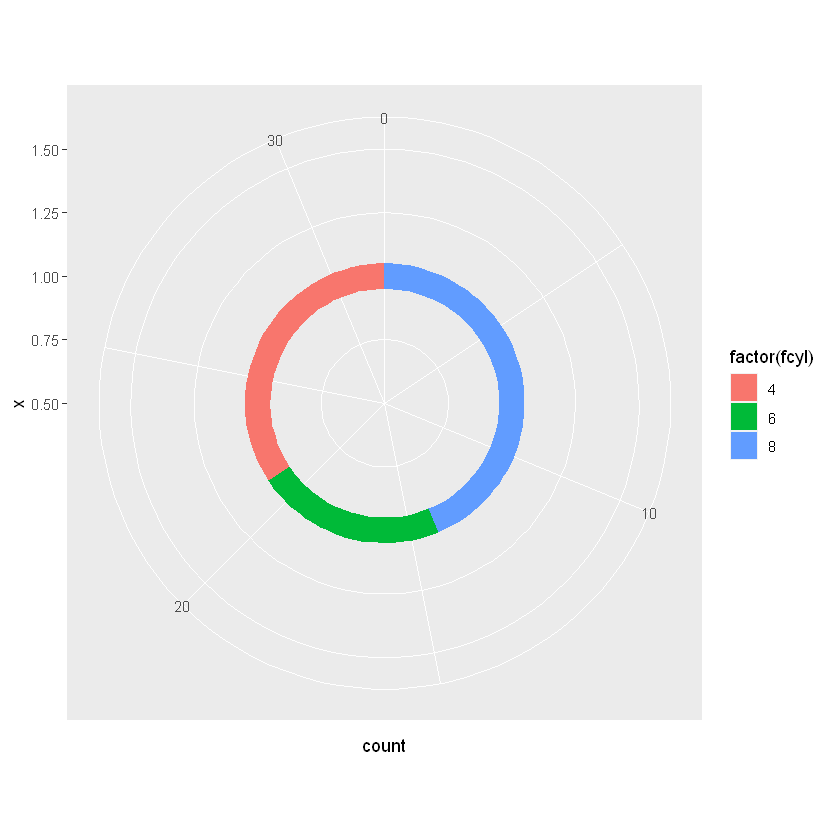

In [30]:
ggplot(mtcars, aes(x = 1, fill = factor(fcyl))) +
  # Reduce the bar width to 0.1
  geom_bar(width = 0.1) +
  coord_polar(theta = "y") +
  # Add a continuous x scale from 0.5 to 1.5
  scale_x_continuous(limits = c(0.5, 1.5))

### **`10-Wind rose plots`**

Polar coordinate plots are well-suited to scales like compass direction or time of day. A popular example is the "wind rose".

The `wind` dataset is taken from the `openair` package and contains hourly measurements for windspeed (`ws`) and direction (`wd`) from London in 2003. Both variables are factors.

In [32]:
wind <- read.table("..\\00_datasets\\wind.txt", sep="\t", header=TRUE)
head(wind)

,date,ws,wd
,<chr>,<chr>,<chr>
1,1/1/2003 0:00,4 - 6,SSE
2,1/1/2003 1:00,4 - 6,SE
3,1/1/2003 2:00,2 - 4,SE
4,1/1/2003 3:00,4 - 6,SE
5,1/1/2003 4:00,4 - 6,SE
6,1/1/2003 5:00,4 - 6,SE


-   Make a classic bar plot mapping `wd` onto the `x` aesthetic and `ws` onto `fill`.

-   Use a `geom_bar()` layer, since we want to aggregate over all date values, and set the `width` argument to 1, to eliminate any spaces between the bars.

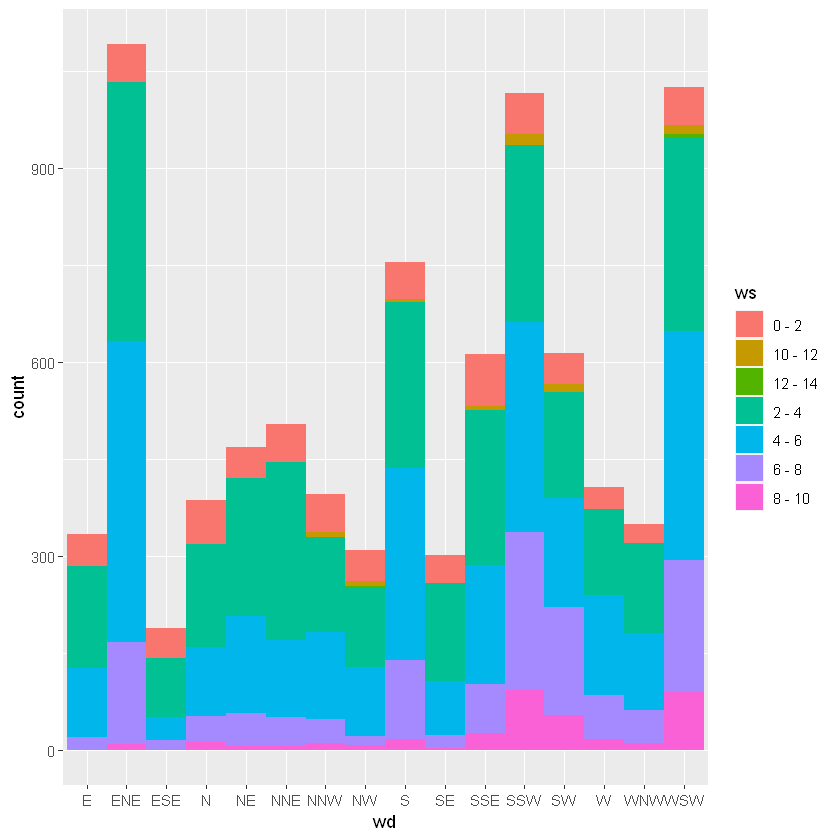

In [34]:
# Using wind, plot wd filled by ws
ggplot(wind, aes(x = wd, fill = ws)) +
  # Add a bar layer with width 1
  geom_bar(width = 1)

-   Convert the Cartesian coordinate space into a polar coordinate space with `coord_polar()`.


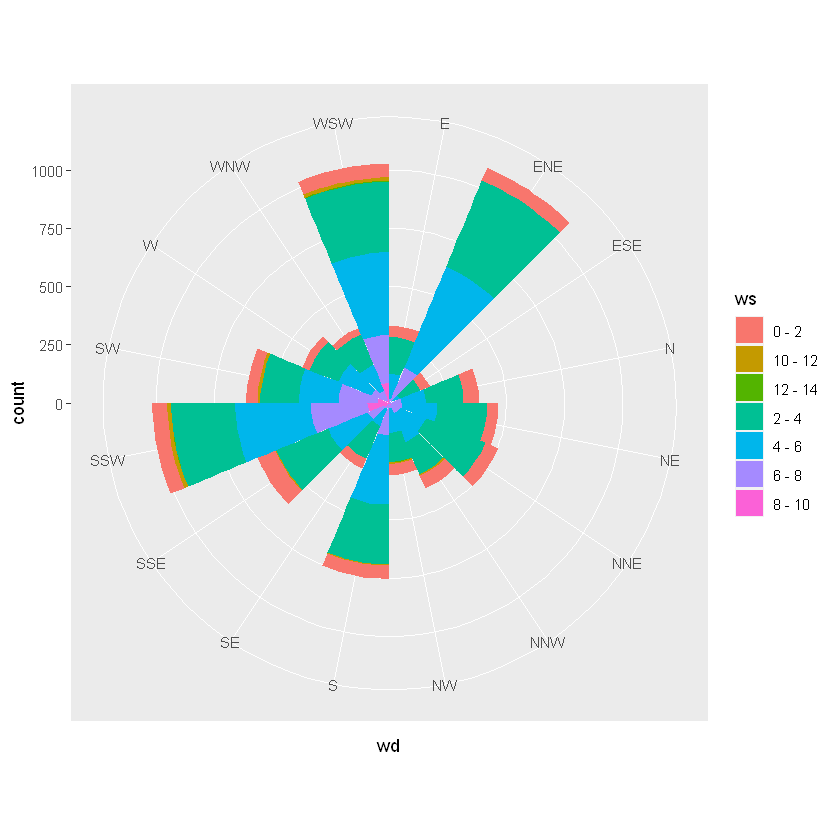

In [35]:
# Convert to polar coordinates:
ggplot(wind, aes(wd, fill = ws)) +
  geom_bar(width = 1) +
  coord_polar()

-   Set the `start` argument to `-pi/16` to position North at the top of the plot.

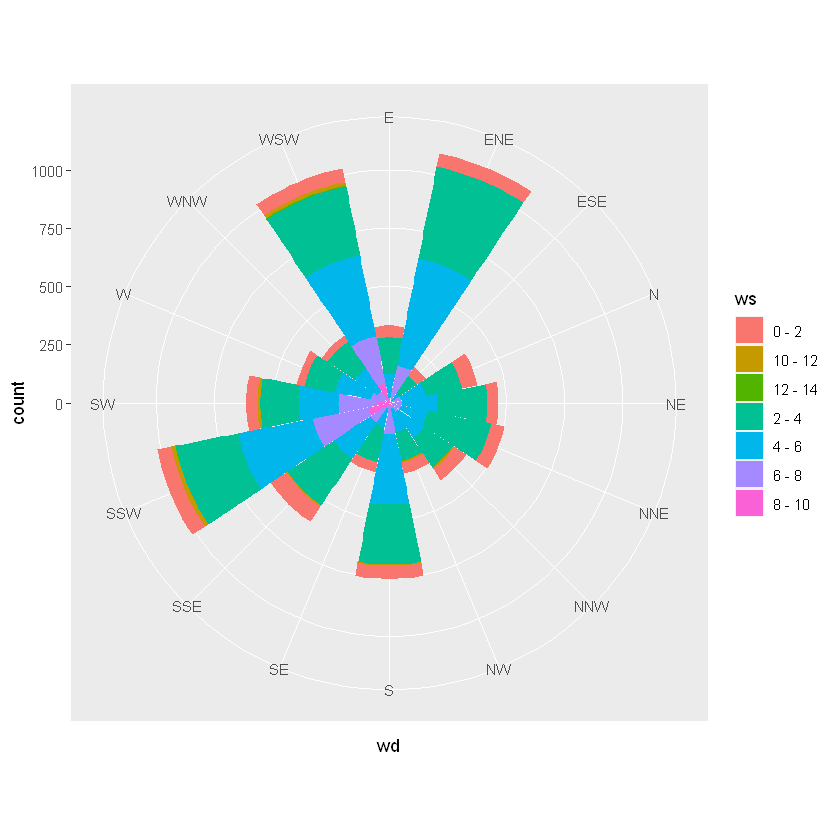

In [36]:
# Convert to polar coordinates:
ggplot(wind, aes(wd, fill = ws)) +
  geom_bar(width = 1) +
  coord_polar(start = -pi/16)

### **`The End`**